In [1]:
import sys

import cv2 as cv
import matplotlib.pyplot as plt

## Задание 1: 
### На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). 
#### Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

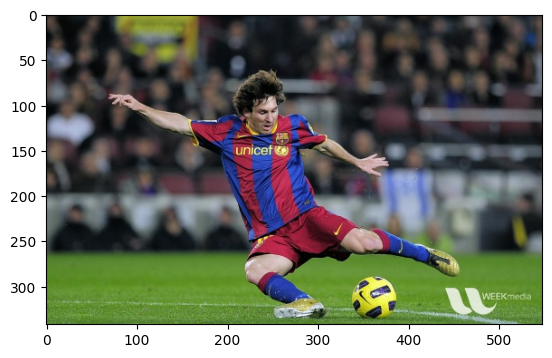

In [2]:
image = cv.imread("images/messi5.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

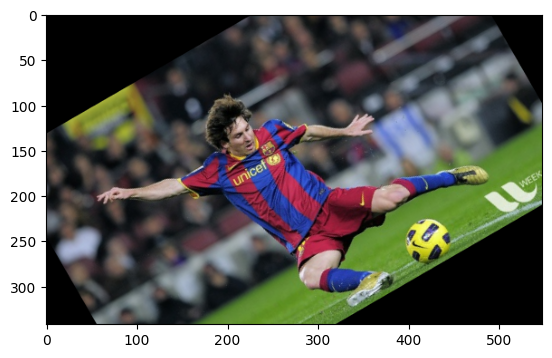

In [3]:
# Определим данные картинки
(height, width) = image.shape[:2]
center = (width / 2, height / 2)
# Произведём поворот на 45 градусов
angle = 30
scale = 1.0
matrix = cv.getRotationMatrix2D(center, angle, scale)
rotated_by_matrix = cv.warpAffine(image, matrix, (width, height))
plt.imshow(rotated_by_matrix)

## Задание 2: 
### В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).

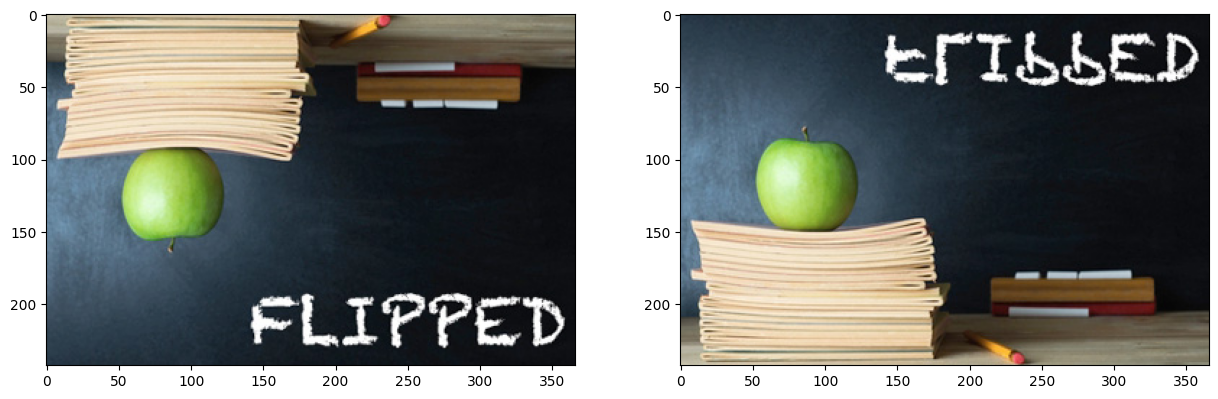

In [4]:
img1 = cv.imread("images/apple.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img1_flip = cv.flip(img1, 0)

# Prepare the plot
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].imshow(img1)
axs[1].imshow(img1_flip)

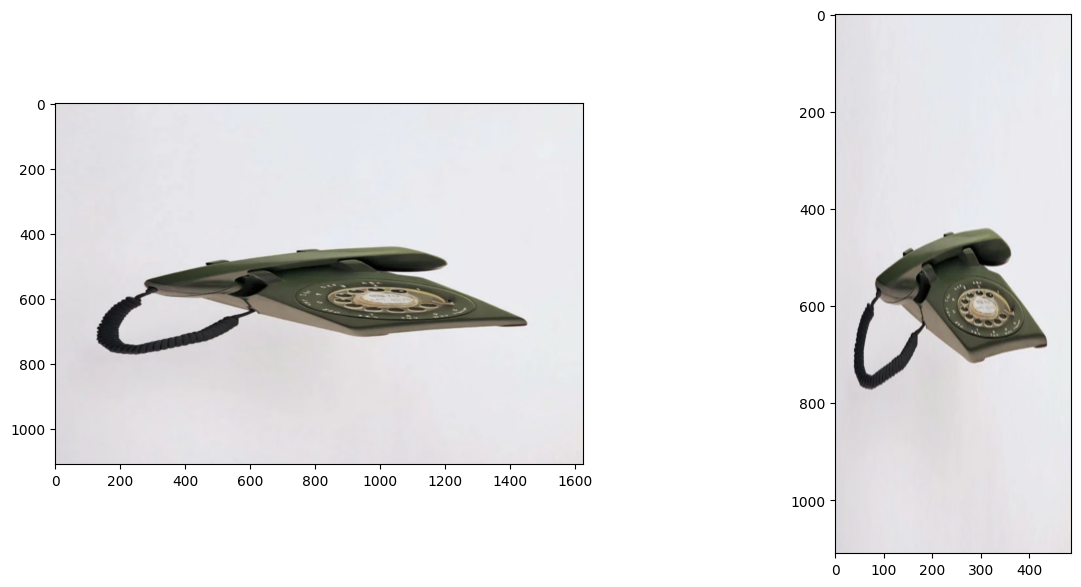

In [5]:
img2 = cv.imread("images/phone.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

import numpy as np

sx = 0.3
sy = 1
M = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
]
)

height, width = img2.shape[:2]
# Внимание: мы указываем width, height в другом порядке!
img2_res = cv.warpAffine(img2, M, (int(width * sx), int(height * sy)))


# Prepare the plot
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].imshow(img2)
axs[1].imshow(img2_res)

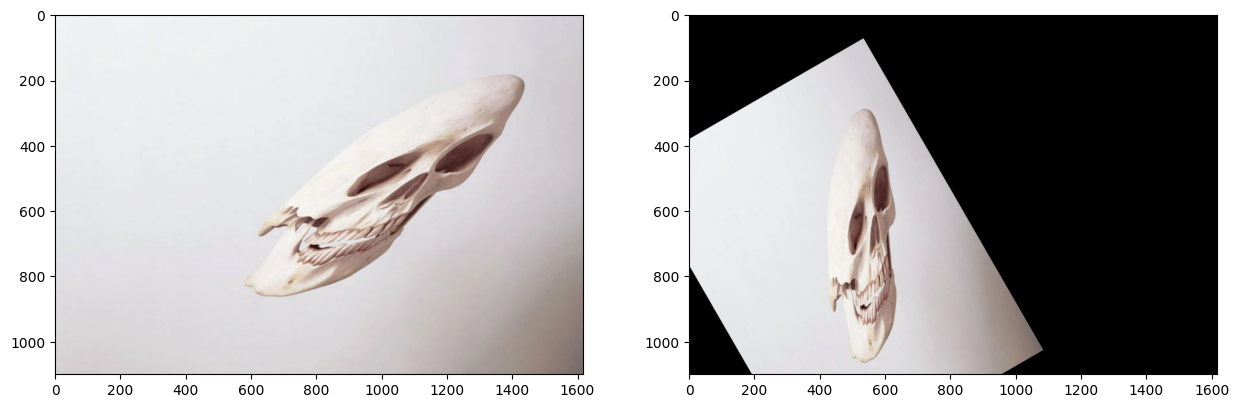

In [6]:
img3 = cv.imread("images/skull.png")
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

img3_res = cv.flip(img3, 0)

sx = 0.5
sy = 1
M = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
]
)

height, width = img3.shape[:2]
# Внимание: мы указываем width, height в другом порядке!
img3_res = cv.warpAffine(img3, M, (int(width * sx), int(height * sy)))

center = (width / 2, height / 2)
# Произведём поворот на 45 градусов
angle = 30
scale = 1.0
matrix = cv.getRotationMatrix2D(center, angle, scale)
img3_res = cv.warpAffine(img3_res, matrix, (width, height))

# Prepare the plot
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].imshow(img3)
axs[1].imshow(img3_res)

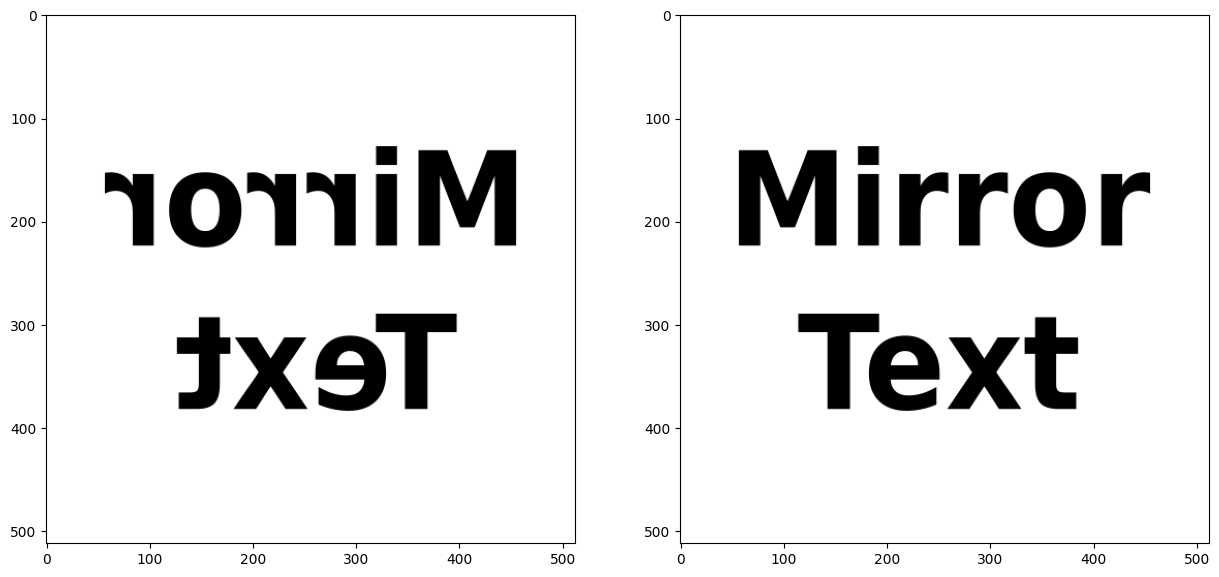

In [8]:
img4 = cv.imread("images/text.png")
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

img4_flip = cv.flip(img4, 1)

# Prepare the plot
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].imshow(img4)
axs[1].imshow(img4_flip)